In [13]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [14]:
def gradient_method_quadratic(A, b, x0, epsilon):
## We define the algorithm to minimize 
#       x^t A x + 2 b^t x
#
#  Input: x0 is the initial gues; epsilon is the stopping criteria
#  Output: x is the final solution, and fun_val is the minimal objective value
##    
    x = x0
    x_all = [x0]
    ite = 0 
    grad = 2 * (A@x + b)
    while np.linalg.norm(grad) > epsilon:
        ite = ite + 1
        t = np.asarray(np.linalg.norm(grad)**2/(2*grad.T@A@grad))
        x = x - t*grad
        grad = 2 * (A@x + b)
        fun_val = x.T@A@x + 2* b.T@x
        x_all.append(x)       
        #print("iter_number = %3d norm_grad = %2.6f fun_val = %2.6f" %(ite, np.linalg.norm(grad), fun_val))
        #print(x)
    return x, fun_val, x_all

**Example 4.6 (exact line search)** Consider the following optimization problem 
$$\min_{x,y}~x^2 + 20y^2.$$
We solve this problem using the gradient descent with exact line search. 

Because we can write the above function as a quadratic, we can use the quadratic gradient method.

In [15]:
A = np.array([[1, 0], [0,20]])
b = np.array([0, 0])
x0 = np.array([20, 1])
epsilon = 1e-10

In [16]:
A

array([[ 1,  0],
       [ 0, 20]])

In [17]:
x, fun_val, x_all = gradient_method_quadratic(A, b, x0, epsilon)
print("The solution is ", x)

The solution is  [ 3.32527051e-11 -1.66263526e-12]


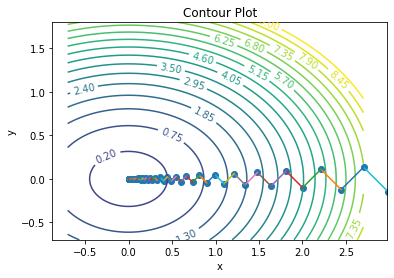

In [18]:
x = np.linspace(-0.7, 2.7, 1000)
y = np.linspace(-0.7, 1.8, 1000)
xmesh, ymesh = np.meshgrid(x,y)
def f(x):
    return x[0]**2+2*x[1]**2
fmesh = f(np.array([xmesh, ymesh]))

fig, ax = plt.subplots()
cp = ax.contour(xmesh, ymesh, fmesh, np.linspace(-2,9,21))
ax.clabel(cp, inline=True, fontsize=10)

x_all_n = np.asarray(x_all)
for i in range(len(x_all) - 1):
    ax.plot(x_all_n[i:i+2].T[0], x_all_n[i:i+2].T[1])
ax.scatter(x_all_n.T[0],x_all_n.T[1])
ax.axis('equal')
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([-0.2,2.3])
ax.set_ylim([-0.7,1.8])
plt.show()

Note the “zig-zag” effect: the direction found at the $k$th iteration $\textbf{x}_{k+1} − \textbf{x}_k$ is orthogonal to the direction found at the $(k+1)$th iteration $\textbf{x}_{k+2} − \textbf{x}_{k+1}$. This is summed up by the lemma below.

**Lemma 4.7.** Let $\{\mathbf{x}_k\}_{k\geq 0}$ be the sequence generated by the gradient method with exact line search for minimizing a continuously differentiable function $f$. Then we have 
$$(\mathbf{x}_{k+2}-\mathbf{x}_{k+1})^\top(\mathbf{x}_{k+1}-\mathbf{x}_k)=0.$$

**Example (constant stepsize).** Consider the following optimization problem 
$$\min_{x,y}~x^2 + 2 y^2.$$
We solve this problem using the gradient descent with a constant stepsize. 

Consider $t=0.1$ and $t=100$.

In [19]:
def gradient_method_constant(f, g, x0, t, epsilon):
    x = x0
    x_all = [x]
    grad = g(x)
    ite = 0
    while np.linalg.norm(grad) > epsilon:
        ite = ite + 1
        x = x - t*grad
        grad = g(x)
        x_all.append(x)
        fun_val = f(x)
        #print("iter_number = %3d norm_grad = %2.6f fun_val = %2.6f" %(ite, np.linalg.norm(grad), fun_val))
        if ite == 1e2:
            break
        
    return x, fun_val, x_all

In [20]:
A = np.array([[1,0], [0,2]])
x, fun_val, x_all = gradient_method_constant(lambda x: x.T@A@x, lambda x:2*A@x, np.array([2,1]), 0.1, 1e-5)

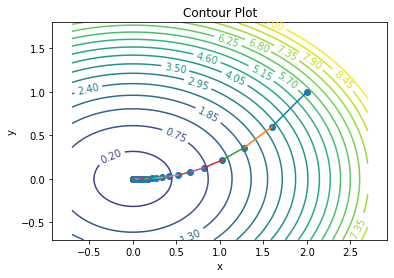

In [21]:
x = np.linspace(-0.7, 2.7, 1000)
y = np.linspace(-0.7, 1.8, 1000)
xmesh, ymesh = np.meshgrid(x,y)
def f(x):
    return x[0]**2+2*x[1]**2
fmesh = f(np.array([xmesh, ymesh]))

fig, ax = plt.subplots()
cp = ax.contour(xmesh, ymesh, fmesh, np.linspace(-2,9,21))
ax.clabel(cp, inline=True, fontsize=10)
ax.set_xlim([-0.2,2.3])
ax.set_ylim([-0.7,1.8])
x_all_n = np.asarray(x_all)
for i in range(len(x_all) - 1):
    ax.plot(x_all_n[i:i+2].T[0], x_all_n[i:i+2].T[1])
ax.scatter(x_all_n.T[0],x_all_n.T[1])
ax.axis('equal')
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**Example 4.9. (stepsize selection by backtracking)** Consider the same optimization problem with backtracking line search. We let $\epsilon=10^{-5}$, $s=2$, $\alpha=1/4$, and $\beta=1/2$.

In [22]:
def gradient_method_backtracking(f, g, x0, s=2, alpha=1/4, beta=0.5, epsilon=1e-5):
    x = x0
    x_all = [x]
    grad = g(x)
    fun_val = f(x)
    ite = 0
    while np.linalg.norm(grad) > epsilon:
        ite = ite + 1
        t = s
        while fun_val - f(x - t*grad) < alpha * t * np.linalg.norm(grad)**2:
            t = beta*t
        x = x - t*grad
        x_all.append(x)
        grad = g(x)
        fun_val = f(x)
        #print("iter_number = %3d norm_grad = %2.6f fun_val = %2.6f" %(ite, np.linalg.norm(grad), fun_val))
        if ite == 1e4:
            break
    return x, fun_val, x_all

In [23]:
A = np.array([[1,0], [0,2]])
x, fun_val, x_all = gradient_method_backtracking(lambda x: x.T@A@x, lambda x:2*A@x, np.array([2,1]))

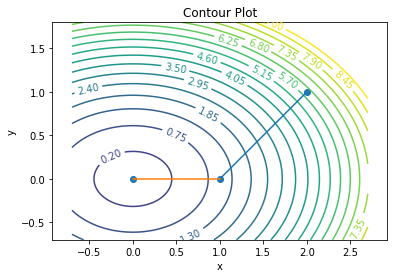

In [24]:
x = np.linspace(-0.7, 2.7, 1000)
y = np.linspace(-0.7, 1.8, 1000)
xmesh, ymesh = np.meshgrid(x,y)
def f(x):
    return x[0]**2+2*x[1]**2
fmesh = f(np.array([xmesh, ymesh]))

fig, ax = plt.subplots()
cp = ax.contour(xmesh, ymesh, fmesh, np.linspace(-2,9,21))
ax.clabel(cp, inline=True, fontsize=10)
ax.set_xlim([-0.2,2.3])
ax.set_ylim([-0.7,1.8])
x_all_n = np.asarray(x_all)
for i in range(len(x_all) - 1):
    ax.plot(x_all_n[i:i+2].T[0], x_all_n[i:i+2].T[1])
ax.scatter(x_all_n.T[0],x_all_n.T[1])
ax.axis('equal')
ax.set_title('Contour Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()